# Exploratory Data Analysis 

This notebook contains EDA on 'session' and 'venue' data and observations.

In [1]:
from collections import Counter
import pandas as pd

# Session Data

In [209]:
# Loading user session data
session_df = pd.read_csv('../data/sessions.csv', index_col=0, dtype={'venue_id':object})
session_df.head(10)

/Users/himanshu1.aggarwal/miniconda3/envs/wolt_assignment/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/himanshu1.aggarwal/miniconda3/envs/wolt_assignment/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,purchased,session_id,position_in_list,venue_id,has_seen_venue_in_this_session,is_new_user,is_from_order_again,is_recommended
3362,True,010befaf-c5aa-43ba-8561-a3e2ccab277b,0,1424193000929084737,True,False,True,False
3363,False,010befaf-c5aa-43ba-8561-a3e2ccab277b,1,-1970346298375932149,False,False,True,False
3364,False,010befaf-c5aa-43ba-8561-a3e2ccab277b,2,-3266889597638182283,False,False,False,False
3365,False,010befaf-c5aa-43ba-8561-a3e2ccab277b,3,-1599030892486223118,False,False,False,False
3366,False,010befaf-c5aa-43ba-8561-a3e2ccab277b,4,-1514693057066477057,False,False,False,False
3367,False,010befaf-c5aa-43ba-8561-a3e2ccab277b,5,5188415623516897594,False,False,True,False
3368,False,010befaf-c5aa-43ba-8561-a3e2ccab277b,6,-3853058847403276971,False,False,False,False
3369,False,010befaf-c5aa-43ba-8561-a3e2ccab277b,7,5332634774045137434,False,False,True,False
3370,False,010befaf-c5aa-43ba-8561-a3e2ccab277b,8,1007590810240705088,False,False,False,False
3371,False,010befaf-c5aa-43ba-8561-a3e2ccab277b,9,1861342593691657724,False,False,True,False


In [279]:
# generating attribute level stats
session_df.describe()

,position_in_list
count,1.369807e+06
mean,2.190713e+02
std,1.567958e+02
min,0.000000e+00
25%,8.000000e+01
50%,1.920000e+02
75%,3.450000e+02
max,6.300000e+02


In [26]:
# generating stats for non-real valued attributes
session_df.describe(include = ['bool', 'object'])

,purchased,session_id,venue_id,has_seen_venue_in_this_session,is_new_user,is_from_order_again,is_recommended
count,1369807,1369807,1369807,1355811,1369807,1369807,1369807
unique,2,4415,1215,2,2,2,2
top,False,eac7cdc2-6047-4dfe-896a-7abbd31bab12,4942885110225136931,False,False,False,False
freq,1365386,2436,2401,1257503,1357096,1282731,1336963


<AxesSubplot:>

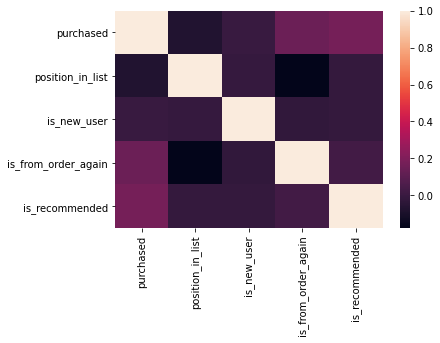

In [106]:
# Observing correlation between attributes
import seaborn as sns
corr = session_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

The above plot shows the absence of strong correlation between attributes and with the target(purchased).

<AxesSubplot:>

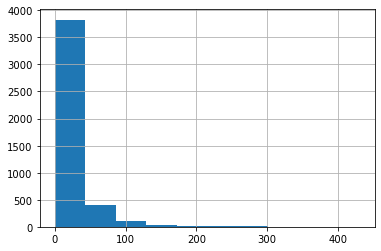

In [281]:
# finding positions of mostly ordered venues
session_df[session_df.purchased==True].position_in_list.hist()

Mostly top ranked items are ordered in sessions.

In [138]:
# number of time each restaurant is ordered from 
session_df[session_df.purchased==True].venue_id.value_counts().describe()

count    691.000000
mean       6.397974
std        7.918384
min        1.000000
25%        1.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: venue_id, dtype: float64

In [61]:
# Finding relationship between purchased and other attributes
session_df.groupby(['purchased', 'has_seen_venue_in_this_session', 'is_from_order_again', 'is_recommended']).size().reset_index().rename(columns={0:'count'})

,purchased,has_seen_venue_in_this_session,is_from_order_again,is_recommended,count
0,False,False,False,False,1164960
1,False,False,False,True,26783
2,False,False,True,False,64272
3,False,False,True,True,1479
4,False,True,False,False,74702
5,False,True,False,True,1661
6,False,True,True,False,17123
7,False,True,True,True,428
8,True,False,False,True,2
9,True,False,True,False,4


Whenever purchased is True, either of the above attribute is marked True, which is obvious since user will order from either recommended, previously ordered or a new listing from the list of venues. Therefore, this verifies that the data mostly depicts the real scenario. 

In [232]:
# how many conversions are there in each session
Counter(session_df[session_df.purchased==True].groupby('session_id').purchased.count())

Counter({1: 4367, 4: 13, 2: 1})

The keys in the above Counter shows the number of conversions, and values depict the number of user sessions. Mostly there is a single engagement in a session. 

In [284]:
# Finding Null values
print(session_df.isnull().sum())
session_df[session_df.has_seen_venue_in_this_session.isnull()]

purchased                             0
session_id                            0
position_in_list                      0
venue_id                              0
has_seen_venue_in_this_session    13996
is_new_user                           0
is_from_order_again                   0
is_recommended                        0
dtype: int64


,purchased,session_id,position_in_list,venue_id,has_seen_venue_in_this_session,is_new_user,is_from_order_again,is_recommended
446865,False,110099e3-a54f-435f-9207-15a95f625302,0,7927650445992206734,NaN,False,False,False
446866,False,110099e3-a54f-435f-9207-15a95f625302,1,7806767714522733618,NaN,False,False,False
446867,False,110099e3-a54f-435f-9207-15a95f625302,2,7192273147090531024,NaN,False,False,False
446868,False,110099e3-a54f-435f-9207-15a95f625302,3,-7893679865011238866,NaN,False,False,False
446869,False,110099e3-a54f-435f-9207-15a95f625302,4,-891158643077214109,NaN,False,False,False
...,...,...,...,...,...,...,...,...
16641050,False,1d58969d-468b-499d-a1db-ba33b73d8b41,222,-3220155853161712429,NaN,False,False,False
16641051,False,1d58969d-468b-499d-a1db-ba33b73d8b41,223,-6435492022737760762,NaN,False,False,False
16641052,False,1d58969d-468b-499d-a1db-ba33b73d8b41,224,2300969183006418341,NaN,False,True,False
16641053,False,1d58969d-468b-499d-a1db-ba33b73d8b41,225,1744504799796043168,NaN,False,False,False


Only one attribute has NaN values and it can be resolved by imputing most common value or by a probabilistic approach to identify value based on other attributes. 

In [285]:
# session_df[(session_df.has_seen_venue_in_this_session.isnull()) & (session_df.purchased==True)]

In [286]:
# observing stats of attributes in each session
attribute = 'venue_id' # venue_id, purchased, has_seen_venue_in_this_session, is_new_user, is_from_order_again, is_recommended, position_in_list
session_df.groupby('session_id')[attribute].describe(include = ['bool', 'object'])

,count,unique,top,freq
session_id,,,,
0013B033-6B3E-4FDF-AFA1-3B1B1E830892,456,456,7278934018529661243,1
0018868d-c07b-42bf-9ac0-7863b1723cdf,620,620,7278934018529661243,1
0032F391-F254-40CA-B1B5-935045823F69,222,222,827519604862358597,1
0043fff6-d7ad-4f05-9b3d-1a31f85199e9,73,73,-1787997410013647823,1
00460B10-5549-43D8-8A64-9BF9268E2B65,73,73,-1787997410013647823,1
...,...,...,...,...
ff66d81b-b521-40db-81e7-1073003e866f,214,214,3001709279289094874,1
ff8c685d-ba5c-4c95-b6b2-052508c72269,541,541,7278934018529661243,1
ff9dfcb1-ff0b-4ff0-9dbc-8f874af156c9,183,183,7192273147090531024,1


In [289]:
# sessions with >1500 engagements
temp = session_df.groupby('session_id').count()
temp[temp.venue_id>1500]

,purchased,position_in_list,venue_id,has_seen_venue_in_this_session,is_new_user,is_from_order_again,is_recommended
session_id,,,,,,,
28a94322-8ed9-4173-a537-9e17e391c401,1708,1708,1708,1708,1708,1708,1708
7bc8e07c-951b-413a-ab1e-c95154d7324e,2192,2192,2192,2192,2192,2192,2192
8cc2d8c1-1e74-4698-b2e6-cd2fcd123685,2056,2056,2056,2056,2056,2056,2056
922817cf-06eb-4593-90dd-bc9f658ce1f6,2420,2420,2420,2420,2420,2420,2420
9b7f7a7a-9d92-4865-bdef-568b8f210947,2024,2024,2024,2024,2024,2024,2024
b8954892-7082-4cdb-a877-5ec701ef37dd,2340,2340,2340,2340,2340,2340,2340
de874ff2-9db1-45b3-9e88-de621379c141,2348,2348,2348,2348,2348,2348,2348
eac7cdc2-6047-4dfe-896a-7abbd31bab12,2436,2436,2436,2436,2436,2436,2436
ed1ad14a-a2d2-4835-aef9-74e11bd3c5f6,2188,2188,2188,2188,2188,2188,2188


In [290]:
# Finding duplicates
temp = session_df[session_df.duplicated()]
print('Total duplicate rows: ', temp[temp.purchased==True].session_id.count())

Total duplicate rows:  27


# Venue Data

In [62]:
# Loading Venue Data
venue_df = pd.read_csv('../data/venues.csv', index_col=0)
venue_df.head()

,venue_id,conversions_per_impression,price_range,rating,popularity,retention_rate
0,1424193000929084737,0.403492,1,8.6,5.537811,0.384964
1,-1970346298375932149,0.191440,1,8.6,0.966034,0.250001
2,-3266889597638182283,0.275382,2,9.0,5.905067,0.304221
3,-1599030892486223118,0.060619,2,8.8,0.754701,0.314371
4,-1514693057066477057,0.170952,2,9.2,5.506692,0.327097


In [63]:
# Observing attribute stats
venue_df.describe()

,venue_id,conversions_per_impression,price_range,rating,popularity,retention_rate
count,1.215000e+03,1141.000000,1215.000000,1131.000000,1215.000000,1149.000000
mean,-7.085144e+16,0.180955,1.920165,8.800760,3.527971,0.272578
std,5.415400e+18,0.136737,0.697876,0.472488,7.914330,0.149528
min,-9.198436e+18,0.000000,0.000000,5.200000,0.000000,0.000000
25%,-4.951103e+18,0.074534,1.000000,8.600000,0.255260,0.189252
50%,-3.351613e+17,0.157566,2.000000,8.800000,1.087460,0.276786
75%,4.738802e+18,0.260286,2.000000,9.000000,3.154630,0.351852
max,9.214050e+18,0.946197,4.000000,10.000000,100.000000,1.000000


In [64]:
venue_df.count()

venue_id                      1215
conversions_per_impression    1141
price_range                   1215
rating                        1131
popularity                    1215
retention_rate                1149
dtype: int64

In [107]:
venue_df.isnull().sum()

venue_id                       0
conversions_per_impression    74
price_range                    0
rating                        84
popularity                     0
retention_rate                66
dtype: int64

There are NaN values in this data as well. Since these are all real valued attributes, mean can be used to impute values. 

In [291]:
# records where all three attributes are Nan
venue_df[(venue_df.retention_rate.isnull()) & (venue_df.conversions_per_impression.isnull()) & (venue_df.rating.isnull())]

,venue_id,conversions_per_impression,price_range,rating,popularity,retention_rate
248,-7470043617865895121,NaN,2,NaN,0.00000,NaN
326,-5786377690441141558,NaN,1,NaN,1.97714,NaN
553,-7147922509823629065,NaN,2,NaN,0.00000,NaN
612,-887684969696034739,NaN,2,NaN,0.00000,NaN
616,8859817844256092646,NaN,2,NaN,0.00000,NaN
1023,7964749261904358047,NaN,2,NaN,0.00000,NaN
1036,-6593632248306054569,NaN,2,NaN,0.00000,NaN


In [89]:
venue_df[venue_df.conversions_per_impression.isnull()]

,venue_id,conversions_per_impression,price_range,rating,popularity,retention_rate
44,1642563663085166220,NaN,2,8.8,0.000000,0.000000
48,1301501383783026371,NaN,2,8.6,0.000000,0.000000
60,-6769357718506661141,NaN,1,7.4,0.000000,NaN
85,7426496466433566528,NaN,1,8.8,0.000000,NaN
206,8495040311801997268,NaN,2,NaN,1.873080,0.000000
...,...,...,...,...,...,...
1159,315551801116351559,NaN,1,7.8,0.071935,0.062501
1165,1229733285361471198,NaN,2,8.4,1.060460,0.111111
1190,1847657957494239078,NaN,1,9.2,0.000000,0.000000
1199,-7626507321447594914,NaN,1,9.0,0.000000,NaN


In [91]:
venue_df[venue_df.rating.isnull()]

,venue_id,conversions_per_impression,price_range,rating,popularity,retention_rate
61,6496596592152775784,0.044003,2,NaN,1.145422,0.264706
65,781655398244205074,0.035904,2,NaN,0.975166,0.000000
66,6684983907102784519,0.000000,2,NaN,0.000000,NaN
67,2498080507057359392,0.004121,2,NaN,0.659047,0.000000
68,8567882870114205288,0.023316,3,NaN,0.277493,0.750000
...,...,...,...,...,...,...
1173,-7056049532053885057,0.000000,2,NaN,0.000000,0.000000
1184,4101804730312023571,0.019108,3,NaN,0.674491,0.124999
1197,-8905771978401820606,0.047872,2,NaN,16.110589,0.000000
1205,-3682942681835489161,0.000000,1,NaN,0.000000,NaN


In [93]:
venue_df[venue_df.retention_rate.isnull()]

,venue_id,conversions_per_impression,price_range,rating,popularity,retention_rate
60,-6769357718506661141,NaN,1,7.4,0.0,NaN
66,6684983907102784519,0.0,2,NaN,0.0,NaN
70,1272481684950902099,0.0,3,9.4,0.0,NaN
85,7426496466433566528,NaN,1,8.8,0.0,NaN
103,-6058314109533187489,0.0,2,8.6,0.0,NaN
...,...,...,...,...,...,...
1133,-9188677762021043549,0.0,2,8.8,0.0,NaN
1150,-1258720604918794303,0.0,2,8.0,0.0,NaN
1199,-7626507321447594914,NaN,1,9.0,0.0,NaN
1204,4305436250894814244,NaN,1,8.0,0.0,NaN


<AxesSubplot:>

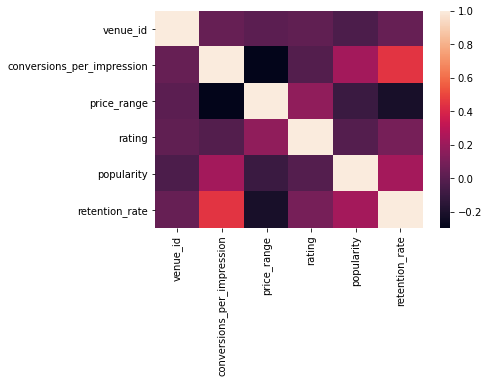

In [105]:
import seaborn as sns
corr = venue_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Similar to session data, there are no strong correlation between attributes in this data. Correlation between rating and popularity was expected, but is not present. It may be the case that all users don't rate the venues, but order from there, which can lead to this.

In [292]:
# Value imputation using sklearn
from sklearn.impute import KNNImputer
X = venue_df[['conversions_per_impression', 'rating']]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
Y = pd.DataFrame(imputer.fit_transform(venue_df))
print(Y.iloc[1197])

0   -8.905772e+18
1    4.787234e-02
2    2.000000e+00
3    8.500000e+00
4    1.611059e+01
5    0.000000e+00
Name: 1197, dtype: float64


In [293]:
# Value imputation using mean
temp = venue_df.fillna(venue_df.mean())
temp.iloc[1197]

venue_id                     -8.905772e+18
conversions_per_impression    4.787234e-02
price_range                   2.000000e+00
rating                        8.800760e+00
popularity                    1.611059e+01
retention_rate                0.000000e+00
Name: 1197, dtype: float64

Both the methods produce similar results, but the skelarn method is more time consuming.